## Final -  NY housing data


In [1]:

#load the modules
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.style as style


In [2]:
# training /error modules
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

In [3]:
#metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [4]:
# Regression
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
pd.set_option('display.max_columns',999)


In [6]:
df = pd.read_csv('nyc-rolling-sales.csv')
print(len(df))
df.head(10)
#load the data(spreadsheet)

84548


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [7]:
# changing the burroughs from numbers to names
df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
#EASE_MEANT is empty and can be dropped
del df['EASE-MENT']

# Unnamed: 0  can be deleted
del df['Unnamed: 0']

In [9]:
#SALE PRICE is object but should be numeric
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

#LAND and GROSS SQUARE FEET is object but should be numeric
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

#SALE DATE is object but should be datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

#Both TAX CLASS attributes should be categorical
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

In [10]:
sum(df.duplicated(df.columns))

765

In [11]:
# delete the duplicates and check that it worked
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))


0

In [12]:
df.shape

(83783, 20)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           83783 non-null object
NEIGHBORHOOD                      83783 non-null object
BUILDING CLASS CATEGORY           83783 non-null object
TAX CLASS AT PRESENT              83783 non-null category
BLOCK                             83783 non-null int64
LOT                               83783 non-null int64
BUILDING CLASS AT PRESENT         83783 non-null object
ADDRESS                           83783 non-null object
APARTMENT NUMBER                  83783 non-null object
ZIP CODE                          83783 non-null int64
RESIDENTIAL UNITS                 83783 non-null int64
COMMERCIAL UNITS                  83783 non-null int64
TOTAL UNITS                       83783 non-null int64
LAND SQUARE FEET                  57729 non-null float64
GROSS SQUARE FEET                 56398 non-null float64
YEAR BUILT                        83783 non-null int6

In [14]:
#To see the above info visually.( It's easier to see where the NULL values are and how many there are visually.)



In [15]:
variables = df.columns

count = []

for variable in variables:
    length = df[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(df), 2)


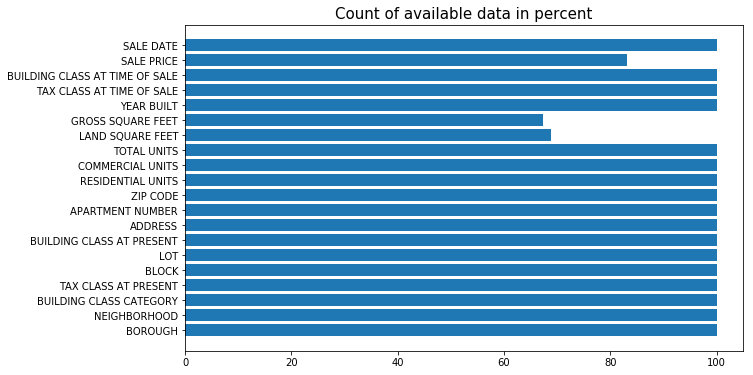

In [16]:
#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

In [17]:
# Remove observations with missing SALE PRICE, (since around 20% of the sales price is missing/null )
df = df[df['SALE PRICE'].notnull()]
len(df)
#After removing the missing SALE PRICES we are left with around 70k, down from 85k at the very start.

69607

In [18]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,4.844900e+04,4.790000e+04,69607.000000,6.960700e+04
mean,4199.890140,374.580473,10741.159323,1.875070,0.164121,2.059319,3.544802e+03,3.528707e+03,1799.852184,1.280703e+06
std,3431.897518,656.232024,1264.804508,14.291398,8.997236,16.992716,3.973875e+04,2.920564e+04,520.099311,1.143036e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1350.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.425000e+03,8.160000e+02,1920.000000,2.300000e+05
50%,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.150000e+03,1.620000e+03,1938.000000,5.330000e+05
75%,6192.000000,820.000000,11249.000000,2.000000,0.000000,2.000000,3.100000e+03,2.508000e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


### Some Graphs of Sale Price

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


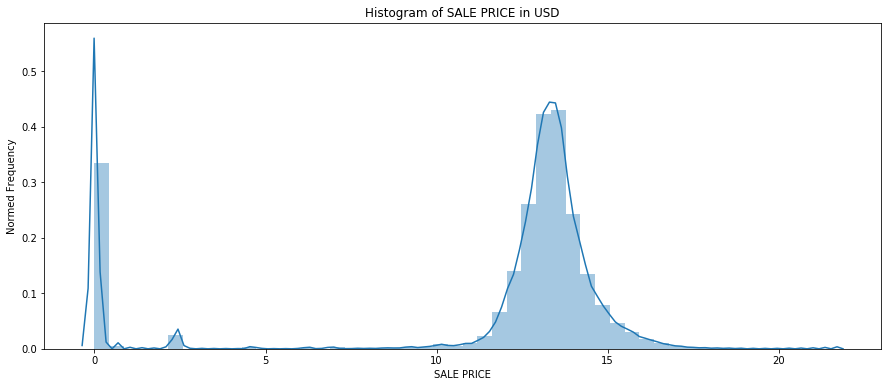

In [19]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(np.log(df['SALE PRICE']+1))
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

### Need to cleanup data more

In [20]:
# Need to get rid of the NULL values and a few outliers.
df = df[df['LAND SQUARE FEET'].notnull()] 
df = df[df['GROSS SQUARE FEET'].notnull()] 


In [21]:
# Keeps properties with fewer than 20,000 Square Feet, which is about 2,000 Square Metres
df = df[df['GROSS SQUARE FEET'] < 20000]
df = df[df['LAND SQUARE FEET'] < 20000]


In [22]:
#gets rid of year built that are 0
df = df[df['YEAR BUILT'] > 0]

In [23]:
df['BUILDING AGE'] = 2017 - df['YEAR BUILT']

In [24]:
# Only a handful of properties with 0 total units are remaining and they will now be deleted
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] < 50)] 


In [25]:
#Remove data where commercial + residential doesn't equal total units
df= df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

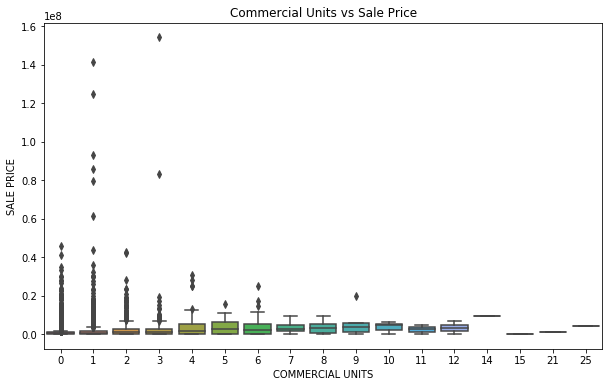

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)
plt.title('Commercial Units vs Sale Price')
plt.show()


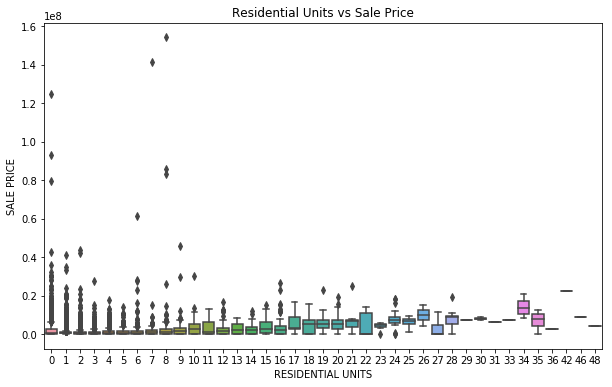

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df)
plt.title('Residential Units vs Sale Price')
plt.show()


In [28]:

# Since alot of the properties in this dataset are cheaper than 950,000 USD 
# we will filter the database with a range of 100k to 5 mill



In [29]:
# Remove observations that fall outside those caps
df1 = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]
len(df1)
# so now the data has around 30k instead of 70k

29638

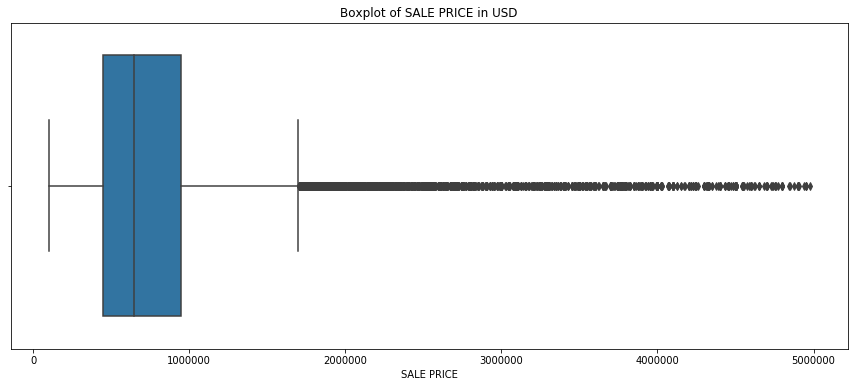

In [30]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=df1)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


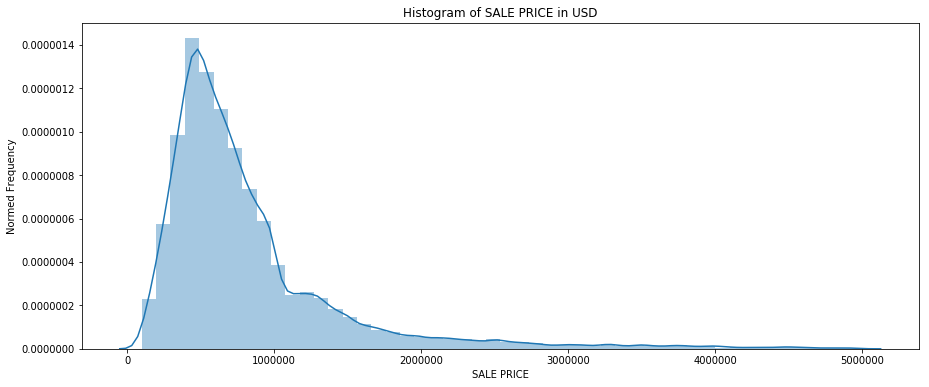

In [31]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(df1['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()


In [32]:

# a Quick look at each borough and the price range of properties sold there

## Bourough


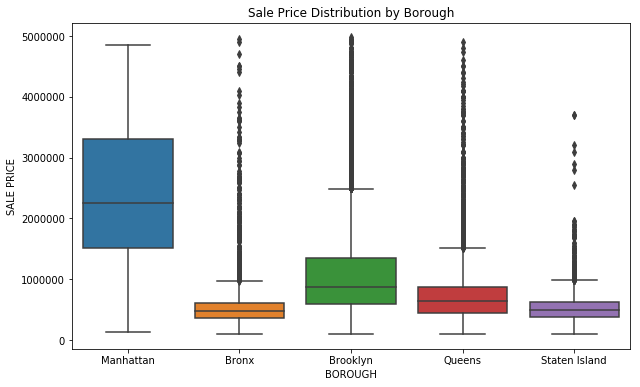

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df1)
plt.title('Sale Price Distribution by Borough')
plt.show()

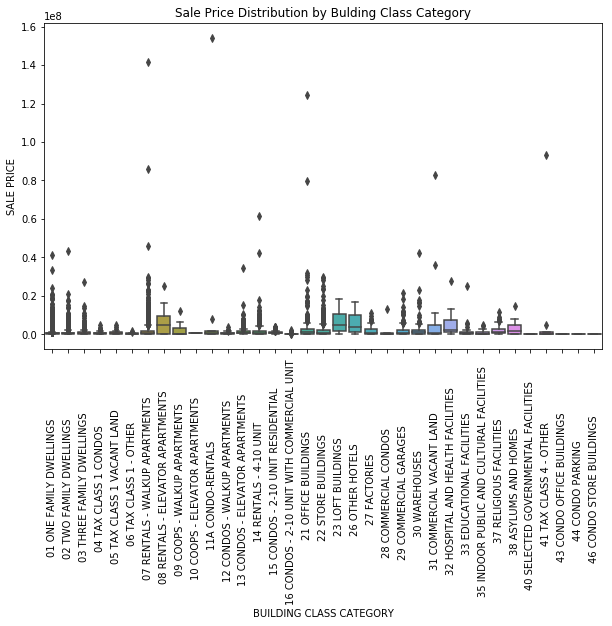

In [34]:
plt.figure(figsize=(10,6))
order = sorted(df['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

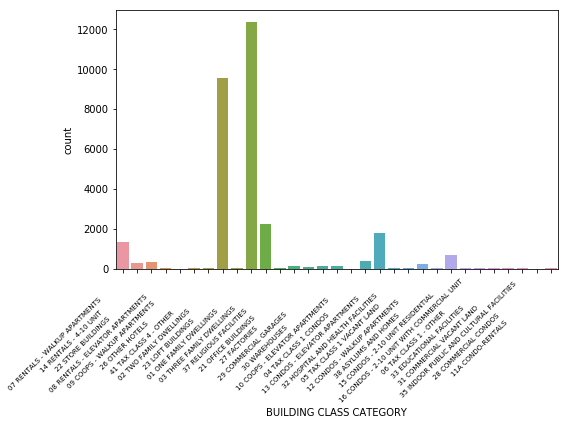

In [35]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df1['BUILDING CLASS CATEGORY'],label="Count")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7, rotation=45, ha="right")
plt.tight_layout()
plt.show()

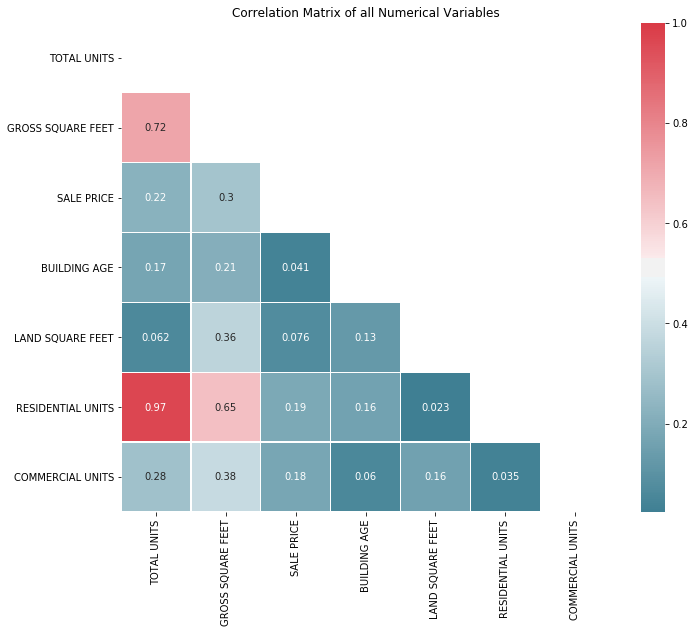

In [36]:
# Correlation Matrix

# Compute the correlation matrix
d= df[['TOTAL UNITS','GROSS SQUARE FEET','SALE PRICE', 'BUILDING AGE', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS', 
         'COMMERCIAL UNITS']]
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()


## Queens Borough- a quick look for fun


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


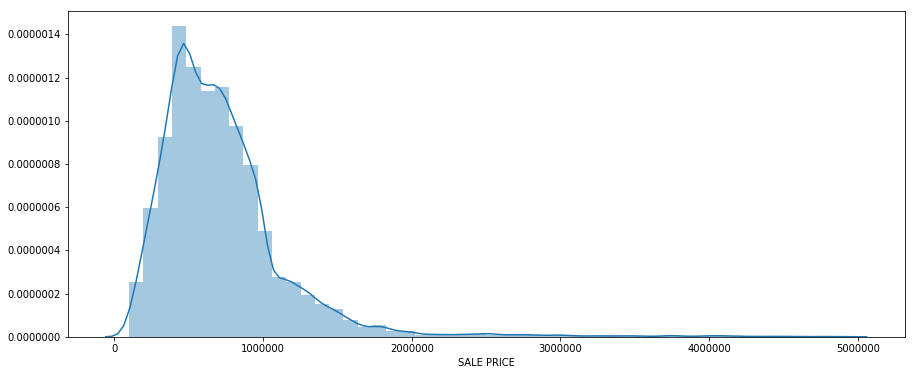

In [37]:
#histogram of Queens borough
plt.figure(figsize=(15,6))
df1_qn = df1[df1.BOROUGH == "Queens"]
sns.distplot(df1_qn['SALE PRICE'])
plt.show()

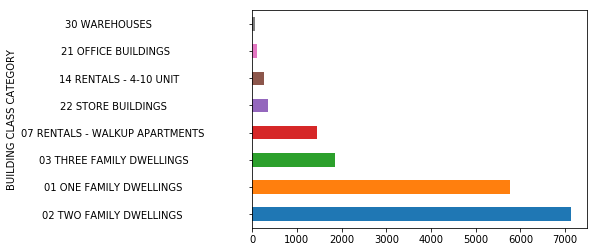

In [38]:
to_plot_qn = df1_qn.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].sum().sort_values(ascending=False)
to_plot_qn.head()
to_plot_qn.head(8).plot(kind='barh')


In [39]:
#use a data to predict price of house if its under a millioln= 0 if its over million =1
#need to make a new collumn

In [40]:
# creat a new collumn where its 0 or 1 based on price
mask=~df['SALE PRICE'].isnull()# use mask object as filtering tool


In [41]:
df[mask]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING AGE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,117
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,104
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,117
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,97
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,97
11,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,D1,530-532 EAST 5TH STREET,,10009,10,0,10,3717.0,12350.0,2009,2,D1,10350000.0,2016-10-17,8
22,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,244 EAST 7TH STREET,,10009,24,0,24,4131.0,16776.0,1928,2,C6,11900000.0,2017-06-21,89
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,624 EAST 9TH STREET,,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,107
173,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,393,4,S4,165 AVENUE B,,10009,4,1,5,2201.0,5608.0,1900,2,S4,7215000.0,2017-01-30,117
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,183 AVENUE B,,10009,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03,107


In [42]:
df_clean=df[mask]

In [43]:
df_clean['SALE PRICE']

0         6625000.0
3         3936272.0
4         8000000.0
6         3192840.0
9        16232000.0
11       10350000.0
22       11900000.0
172       3300000.0
173       7215000.0
174       4750000.0
195       3700000.0
206       7425000.0
209            10.0
212       7750000.0
214       8300000.0
216      16000000.0
218       5950000.0
219       7375000.0
220       8000000.0
221      14100000.0
222       1583840.0
223        416790.0
224        630370.0
227      29400000.0
230       6450000.0
231       5500000.0
232       5750000.0
233       3485000.0
234       4600000.0
277        282000.0
            ...    
84503     1115000.0
84508      769000.0
84510      595000.0
84511      445000.0
84512      785000.0
84514      570000.0
84516      722000.0
84517      545000.0
84518      875000.0
84520      840000.0
84521      772500.0
84522      740000.0
84526      590000.0
84527      580000.0
84528      550000.0
84529      545000.0
84530      800000.0
84531      642500.0
84532      408092.0


In [44]:
#want to see if the data price range set earlier is ok
y=pd.Series(df_clean['SALE PRICE']>1000000).astype(int)
y.mean()

0.1735589608280901

In [45]:
df_clean['SalePrice1mill']=pd.Series(df_clean['SALE PRICE']>1000000).astype(int)
#to make a column for prperty over 1 million = 1 less then 1 million =0

In [46]:
df_clean.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING AGE,SalePrice1mill
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,117,1
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,104,1
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,117,1
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,97,1
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,97,1


In [47]:
# last column will be the Y factor  of Sale price 1 mill

In [48]:
df_clean.to_csv('cdf.csv')#saving the new database